# Importing Relevant Libraries

In [1]:
import matplotlib.pyplot as plot
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import regularizers

## Defining the problem and assembling of the data set


For this machine learning problem, I am trying to find how accurate the model detects the nature of the comments found in the imdb dataset. How accurate can it be able to detect whether the comments are positive or negative. To tackle this problem, I am going to be using the IMDB dataset which consists movie reviews and sentiment annotations.

This machine learning probblem can be classified under <strong> Binary classification </strong> using the IMDB movie reviews data to see if the reviews on the website are positive or negative.
<strong> Binary classification </strong> is used as this dataset invloves 2 classes in which is positive or negative. The data will be obtained from keras dataset.

Since I already know the inputs and outputs I will be getting from this, the hypotheses I will be making at this stage is

1)The ouputs (whethers it negative or positive) can be predicted given the inputs (impdb dataset)

2) The available data in the imdb dataset is sufficient enough as it contains a large amount of data


##  Choosing a measure of success

For this IMDB dataset, the meaaure of success is <strong> accuracy </strong>. This is because this imdb data set is a balanced-classification problem (binary classification). 



## Preparing Data

The imdb dataset will be taken from keras

In [2]:
(trainingData, trainingLabels), (testingData, testingLabels) = imdb.load_data(
num_words=10000)

Since we cannot input a list of integers into the model, we must convert our lists into tensors. For this dataset, I have chosen to vectorise the data. This means the lists of integers will be turned into vectors of zeros and ones.
In the function below, I am vectorizing the training data

In [3]:
def vectorising_to_tensor(test_train_data, dimen =10000):
    # gets the length of the test train data
    ttd_len = len(test_train_data)
    #Creates a matrix filled with zeros
    vector_matrix = np.zeros(( ttd_len, dimen))
    for x, ttd_seq in enumerate(test_train_data):
        #Sets indices to 1
        vector_matrix[x, ttd_seq] = 1.
    return vector_matrix


Vectorising the x train and x test data to tensors.

In [4]:
trainingX = vectorising_to_tensor(trainingData)
testingX = vectorising_to_tensor(testingData)

The codes below helps to vectorize the training and testing labels

In [5]:
trainingY = np.asarray(trainingLabels).astype('float32')
testingY = np.asarray(testingLabels).astype('float32')

## Developing a model that does better than baseline

The baseline accuracy for IMDB must be greater than 50%. 

##### The hypotheses I am making here is

1) The outputs created can be prdeicted by the inputs I feed intp the model

2) The data that is availabe in the IMDB dataset is detailed and using these data will help us learn the relationship between the input data and the output data

##### To build my first working model, 

1) The last-layer activation which shows the constraints of the output, will be sigmoid as the problem is a binary classification problem and the outputs of the model network is either going to be 1 or 0 ( Probability)

2) The  Loss function used will be "binary_crossentropy" as a binary classification problem is being solved here and the its appropriate for the output here which is a probability

3) The optimisation configration used is rmsprop.

To have a base line model, I have used 3 layers. There are two intermediate with 4 hidden units which used relu as the activation function. The third layer the activation function being used is sigmoid as the resultof the model will be either negative or positive, a probability. 

In [6]:
imdb_model = models.Sequential()
imdb_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
imdb_model.add(layers.Dense(4, activation='relu'))
imdb_model.add(layers.Dense(1, activation='sigmoid'))

## Deciding on an evaluation protocol

Since the IMDB dataset has plenty of data, the evaluation protocol that I will be using is <strong> "Maintaining a hold-out validation set"</strong> The code extract below sets apart 10,000 samples from the training data.

In [7]:
x_validation = trainingX[:10000]
partialXTrain =trainingX[10000:]
y_validation = trainingY[:10000]
partialYTrain = trainingY[10000:]

As mentioned, the optimiser used will be rmsprop, loss is binary crossentropy and the metrics to measure success will be accuracy

In [8]:
imdb_model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

This is the training of model using the validation data for 4 epochs which means 4 iterations over all the training tensors in batch sizes og 512. Fit these into the model and label it imdb_history.

In [9]:
imdb_history = imdb_model.fit(partialXTrain,
                    partialYTrain,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/4
30/30 [==============================] - 3s 37ms/step - loss: 0.6371 - accuracy: 0.6475 - val_loss: 0.5864 - val_accuracy: 0.7179
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.5264 - accuracy: 0.8306 - val_loss: 0.4994 - val_accuracy: 0.8106
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.4234 - accuracy: 0.8896 - val_loss: 0.4083 - val_accuracy: 0.8754
Epoch 4/4
30/30 [==============================] - 1s 22ms/step - loss: 0.3403 - accuracy: 0.9109 - val_loss: 0.3520 - val_accuracy: 0.8823


The validation and training loss will be drawn in a graph format.

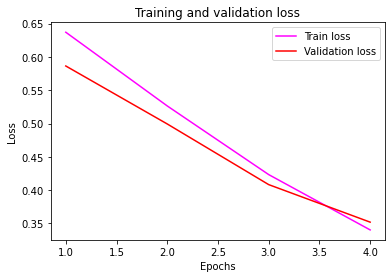

In [10]:
history_dict_val = imdb_history.history
lossValues = history_dict_val['loss']
validationLossValues = history_dict_val['val_loss']
lenLv = len(lossValues)
ep_ochs = range(1, lenLv + 1)
plot.plot(ep_ochs, lossValues, color='magenta',linestyle='solid', label='Train loss')
plot.plot(ep_ochs, validationLossValues, color='red',linestyle='solid', label='Validation loss')
plot.title('Training and validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

## Developing a model that overfits

The baseline model created does not have enough layers so it cannot model the problems properly. We need a model that is between underfitting and overfitting, a balance between optimisation and generalisation. To find the right model that doesnt underfit or overfit, we must first make the model overfit first. Then only we will be able to figure out the right model.

To make my model overfit, 
1) I made the layers bigger by using 512 units per layer. 

To spot overfitting, we should observe the training loss and validation loss. When the model doesnt perform well on the validation data set that it the perfomance of the model starts to dwindle,it is overfitting.The validation loss will go up.

In [11]:
imdb_model = models.Sequential()
imdb_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
imdb_model.add(layers.Dense(512, activation='relu'))
imdb_model.add(layers.Dense(1, activation='sigmoid'))



In [12]:
imdb_model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
imdb_history = imdb_model.fit(partialXTrain,
                    partialYTrain,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/4
30/30 [==============================] - 7s 183ms/step - loss: 0.5331 - accuracy: 0.7730 - val_loss: 0.5172 - val_accuracy: 0.7477
Epoch 2/4
30/30 [==============================] - 5s 169ms/step - loss: 0.2465 - accuracy: 0.9032 - val_loss: 0.3042 - val_accuracy: 0.8779
Epoch 3/4
30/30 [==============================] - 5s 175ms/step - loss: 0.1555 - accuracy: 0.9403 - val_loss: 0.2934 - val_accuracy: 0.8880
Epoch 4/4
30/30 [==============================] - 5s 173ms/step - loss: 0.0577 - accuracy: 0.9809 - val_loss: 1.3668 - val_accuracy: 0.7012


As we can see from the validation and training loss graph, the model's performance using the validation data has dwindled. This is because the validation loss increases after 3 epochs and it remains high. Therefore, we have achieved overfitting.

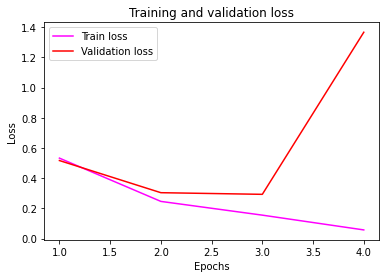

In [14]:
history_dict_val = imdb_history.history
lossValues = history_dict_val['loss']
validationLossValues = history_dict_val['val_loss']
lenLv = len(lossValues)
ep_ochs = range(1, lenLv + 1)
plot.plot(ep_ochs, lossValues, color='magenta',linestyle='solid', label='Train loss')
plot.plot(ep_ochs, validationLossValues, color='red',linestyle='solid', label='Validation loss')
plot.title('Training and validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

# Regularizing the model and tuning your hyperparameters

Since we have achieved overfitting, our job now is to make the 
model work between underfitting and overfitting. So we have to fine 
tune our hyperparameters and regularize the model to reduce overfitting. We will modify the values until the model gets better.

I have added L2 regularisation and drop out value of 0.2.

In [15]:
imdb_model = models.Sequential()
imdb_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
imdb_model.add(layers.Dropout(0.2))
imdb_model.add(layers.Dense(1, activation='sigmoid'))


In [16]:
imdb_model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [17]:
imdb_history = imdb_model.fit(partialXTrain,
                    partialYTrain,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/4
30/30 [==============================] - 7s 195ms/step - loss: 0.8658 - accuracy: 0.7708 - val_loss: 0.5175 - val_accuracy: 0.8641
Epoch 2/4
30/30 [==============================] - 6s 187ms/step - loss: 0.4658 - accuracy: 0.8687 - val_loss: 0.5321 - val_accuracy: 0.8160
Epoch 3/4
30/30 [==============================] - 5s 180ms/step - loss: 0.3938 - accuracy: 0.8942 - val_loss: 0.5394 - val_accuracy: 0.8104
Epoch 4/4
30/30 [==============================] - 5s 183ms/step - loss: 0.3770 - accuracy: 0.8944 - val_loss: 0.4117 - val_accuracy: 0.8734


As seen from the graph below the validation loss has decreased after 3 epochs, proving that the overfitting has been removed anf the model is now performing well. Therefore, it has been established that the model performs well on the valisation data set. 

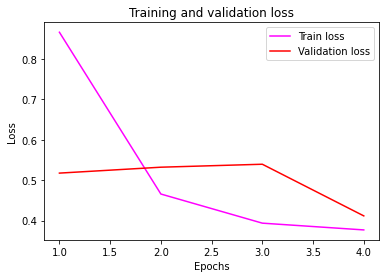

In [18]:
history_dict_val = imdb_history.history
lossValues = history_dict_val['loss']
validationLossValues = history_dict_val['val_loss']
lenLv = len(lossValues)
ep_ochs = range(1, lenLv + 1)
plot.plot(ep_ochs, lossValues, color='magenta',linestyle='solid', label='Train loss')
plot.plot(ep_ochs, validationLossValues, color='red',linestyle='solid', label='Validation loss')
plot.title('Training and validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

## Final Accuracy using test data

In [19]:
imdb_history = imdb_model.fit(testingX,
                    testingY,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/4
49/49 [==============================] - 9s 194ms/step - loss: 0.4118 - accuracy: 0.8687 - val_loss: 0.4939 - val_accuracy: 0.8203
Epoch 2/4
49/49 [==============================] - 9s 178ms/step - loss: 0.3646 - accuracy: 0.8878 - val_loss: 0.3674 - val_accuracy: 0.8865
Epoch 3/4
49/49 [==============================] - 9s 183ms/step - loss: 0.3481 - accuracy: 0.8926 - val_loss: 0.3854 - val_accuracy: 0.8761
Epoch 4/4
49/49 [==============================] - 9s 179ms/step - loss: 0.3414 - accuracy: 0.8957 - val_loss: 0.3631 - val_accuracy: 0.8868


When the test values were used into the model, we can see from the graph that the validation loss decreased after 3 epochs.This shows that the model also works well with the test data. Therefore, the model is has a satisfactory configyration.

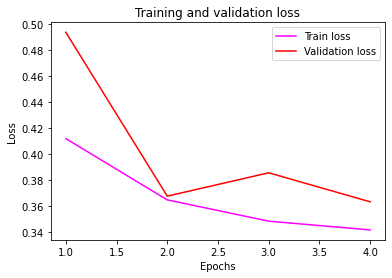

In [20]:
history_dict_val = imdb_history.history
lossValues = history_dict_val['loss']
validationLossValues = history_dict_val['val_loss']
lenLv = len(lossValues)
ep_ochs = range(1, lenLv + 1)
plot.plot(ep_ochs, lossValues, color='magenta',linestyle='solid', label='Train loss')
plot.plot(ep_ochs, validationLossValues, color='red',linestyle='solid', label='Validation loss')
plot.title('Training and validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

Moreover, after evaluating the model with the test data, the model has achieved an accuracy of 93% which is pretty high. This proves that the model is good.

In [21]:
imdb_results = imdb_model.evaluate(testingX, testingY)

782/782 [==============================] - 11s 14ms/step - loss: 0.2678 - accuracy: 0.9395


# References

##### Deep Learning with Python Francois Chollet Chapter 4.5 Pg 111-115
##### Deep Learning with Python Francois Chollet Chapter 3.4 Pg 68-74